In [ ]:
!pip install mtcnn

     |████████████████████████████████| 2.3 MB 596 kB/s eta 0:00:01


In [ ]:
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
import os
from PIL import Image
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # opencv
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot as plt
from keras.models import load_model

In [ ]:
trainX = []
trainy = []
for i in glob.glob('../input/5-celebrity-faces-dataset/train/*/*.jpg'):
    a = plt.imread(i)  
    try:
        detector = MTCNN()
        results = detector.detect_faces(a)
        x1, y1, width, height = results[0]['box']
        # deal with negative pixel index
        x1, y1 = abs(x1), abs(y1)
        x2, y2 = x1 + width, y1 + height
        # extract the face
        face = a[y1:y2, x1:x2]
        image = Image.fromarray(face)
        image = image.resize((160,160))
        face_array = np.asarray(image)
        trainX.append(face_array)
        trainy.append(i.split('/')[4])
    except:
        pass
testX = []
testy = []
for i in glob.glob('../input/5-celebrity-faces-dataset/val/*/*.jpg'):
    
    a = plt.imread(i)  
    try:
        detector = MTCNN()
        results = detector.detect_faces(a)
        x1, y1, width, height = results[0]['box']
        # deal with negative pixel index
        x1, y1 = abs(x1), abs(y1)
        x2, y2 = x1 + width, y1 + height
        # extract the face
        face = a[y1:y2, x1:x2]
        image = Image.fromarray(face)
        image = image.resize((160,160))
        face_array = np.asarray(image)
        testX.append(face_array)
        testy.append(i.split('/')[4])
    except:
        pass
trainX = np.array(trainX)
print('{},{}'.format(trainX.shape,trainy))
testX= np.array(testX)
print('{},{}'.format(testX.shape,testy))

(92, 160, 160, 3),['madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jer

In [ ]:
label = []
data = []
for i in glob.glob('../input/ear-processed/125/*'):
    try:
        if (i.split('/')[-1].split('_')[0]) == '001' or (i.split('/')[-1].split('_')[0]) == '002' or (i.split('/')[-1].split('_')[0]) == '004'  or (i.split('/')[-1].split('_')[0]) == '005' or (i.split('/')[-1].split('_')[0]) == '006'  :
            label.append(int(i.split('/')[-1].split('_')[0]))
            a = plt.imread(i)
            data.append(a)
    except:
        pass

label_1 = []
data_1 = []
for i in glob.glob('../input/ear-processed/221/*'):
    try:
        if (i.split('/')[-1].split('_')[0]) == '001' or (i.split('/')[-1].split('_')[0]) == '002' or (i.split('/')[-1].split('_')[0]) == '004'  or (i.split('/')[-1].split('_')[0]) == '005' or (i.split('/')[-1].split('_')[0]) == '006'  :
            label_1.append(int(i.split('/')[-1].split('_')[0]))
            a = plt.imread(i)
            data_1.append(a)
    except:
        pass

data1 = np.array(data)/255.0
data2 = np.array(data_1)/255.0

# data = 0.5*data1+0.5*data2
data =data1

print(data.shape)

(22, 180, 50)


Loaded Model
(92, 128)
(24, 128)
Dataset: train=92, test=24
Accuracy: train=100.000, test=100.000
Predicted: 
['ben_afflek' 'elton_john' 'jerry_seinfeld' 'madonna' 'mindy_kaling'] 
[ 1.93264527  3.71971884 89.68949953  2.6545313   2.00360506]
Expected: jerry_seinfeld


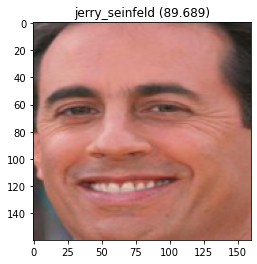

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(trainy)

facenet_model = load_model('../input/facenet-keras/facenet_keras.h5')
print('Loaded Model')

def get_embedding(model, face):
    # scale pixel values
    face = face.astype('float32')
    # standardization
    mean, std = face.mean(), face.std()
    face = (face-mean)/std
    # transfer face into one sample (3 dimension to 4 dimension)
    sample = np.expand_dims(face, axis=0)
    # make prediction to get embedding
    yhat = model.predict(sample)
    return yhat[0]
emdTrainX = list()
for face in trainX:
    emd = get_embedding(facenet_model, face)
    emdTrainX.append(emd)
    
emdTrainX = np.asarray(emdTrainX)
print(emdTrainX.shape)

emdTestX = list()
for face in testX:
    emd = get_embedding(facenet_model, face)
    emdTestX.append(emd)
emdTestX = np.asarray(emdTestX)
print(emdTestX.shape)

# save arrays to one file in compressed format
np.savez_compressed('5-celebrity-faces-embeddings.npz', emdTrainX, trainy, emdTestX, testy)

print("Dataset: train=%d, test=%d" % (emdTrainX.shape[0], emdTestX.shape[0]))
# normalize input vectors
in_encoder = Normalizer()
emdTrainX_norm = in_encoder.transform(emdTrainX)
emdTestX_norm = in_encoder.transform(emdTestX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy_enc = out_encoder.transform(trainy)
testy_enc = out_encoder.transform(testy)
# fit model
model_face = SVC(kernel='linear', probability=True)
model_face.fit(emdTrainX_norm, trainy_enc)
# predict
yhat_train = model_face.predict(emdTrainX_norm)
yhat_test = model_face.predict(emdTestX_norm)
# score
score_train = accuracy_score(trainy_enc, yhat_train)
score_test = accuracy_score(testy_enc, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))


from random import choice
# select a random face from test set
selection = choice([i for i in range(testX.shape[0])])
random_face = testX[selection]
random_face_emd = emdTestX_norm[selection]
random_face_class = testy_enc[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])

# prediction for the face
samples = np.expand_dims(random_face_emd, axis=0)
yhat_class = model_face.predict(samples)
yhat_prob = model_face.predict_proba(samples)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
all_names = out_encoder.inverse_transform([0,1,2,3,4])
#print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Predicted: \n%s \n%s' % (all_names, yhat_prob[0]*100))
print('Expected: %s' % random_face_name[0])
# plot face
plt.imshow(random_face)
title = '%s (%.3f)' % (predict_names[0], class_probability)
plt.title(title)
plt.show()

In [ ]:
out_encoder = LabelEncoder()
out_encoder.fit(label)
label_enc = out_encoder.transform(label)

D = []
for i in data:
    D.append(i.flatten())
D = np.array(D)

import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(D, label_enc, test_size=0.33, random_state=42)

model = SVC(kernel='linear', probability=True)
model.probability=True
model.fit(X_train, y_train)

pred_prob = model.predict_proba(X_test[1].reshape(1,-1))
print('Names : {}'.format([all_names[x] for x in range(5)]))
print('Confidence: {}'.format(pred_prob))

Names : ['ben_afflek', 'elton_john', 'jerry_seinfeld', 'madonna', 'mindy_kaling']
Confidence: [[0.13322995 0.56745516 0.12269345 0.07916436 0.09745708]]


# Fusion

In [ ]:

def most_frequent(List): 
    counter = 0
    num = List[0] 
      
    for i in List: 
        curr_frequency = List.count(i) 
        if(curr_frequency> counter): 
            counter = curr_frequency 
            num = i 
  
    return num 

In [ ]:
# fused_1 = np.concatenate((np.array(yhat_prob*100), np.array(pred_prob)*100),axis = 1)
val = []
for i in range(len(X_test)):
    for j in range(len(testy_enc)):
        if y_test[i] == yhat_test[j]:
            pred_prob = model.predict_proba(X_test[i].reshape(1,-1))
            yhat_prob = model_face.predict_proba(emdTestX_norm[j].reshape(1,-1))
            a = np.array(yhat_prob*100)/np.array(yhat_prob*100).max() + (np.array(pred_prob)*100)/(np.array(pred_prob)*100).max()
            fused_2 = (a/a.max())*100
            fused_final = np.concatenate((np.array(yhat_prob*100), np.array(pred_prob)*100,fused_2),axis = 1)
            val.append(np.argmax(fused_2))
            val.append(pred_prob)
            val.append(yhat_prob)
            val.append(y_test[i])
            val.append(i)
            val.append(j)

Ear Prob Score: [[57.99736686 19.00732055  8.02550447  5.58604097  9.38376715]]
Face Prob Score: [[84.55028536  4.66976355  2.3210527   2.8048399   5.65405849]]
Fused Prediction: 0
actual Label 0


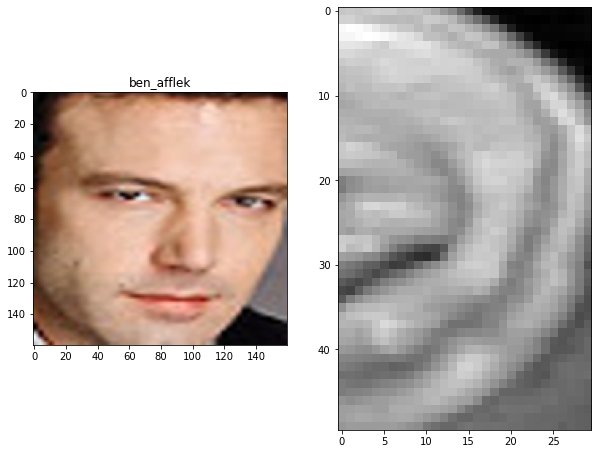

Ear Prob Score: [[57.99736686 19.00732055  8.02550447  5.58604097  9.38376715]]
Face Prob Score: [[69.49786074  9.68048268  3.55542147 11.29955638  5.96667873]]
Fused Prediction: 0
actual Label 0


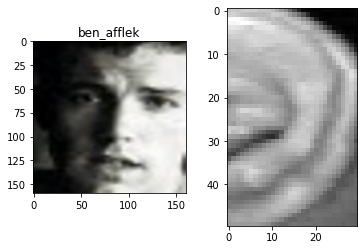

Ear Prob Score: [[57.99736686 19.00732055  8.02550447  5.58604097  9.38376715]]
Face Prob Score: [[87.56072671  2.47523068  1.8969604   3.76756282  4.29951939]]
Fused Prediction: 0
actual Label 0


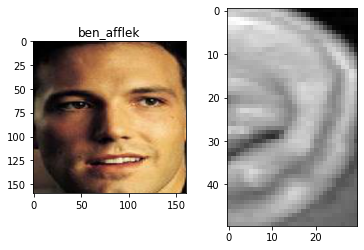

Ear Prob Score: [[57.99736686 19.00732055  8.02550447  5.58604097  9.38376715]]
Face Prob Score: [[86.95872349  3.7017034   2.45749947  3.08217374  3.7998999 ]]
Fused Prediction: 0
actual Label 0


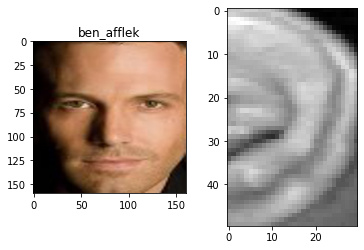

Ear Prob Score: [[57.99736686 19.00732055  8.02550447  5.58604097  9.38376715]]
Face Prob Score: [[87.534035    3.73134524  3.12080476  2.53638753  3.07742747]]
Fused Prediction: 0
actual Label 0


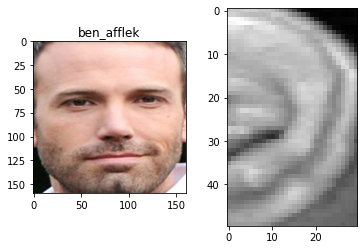

Ear Prob Score: [[13.32299466 56.7455165  12.26934508  7.91643585  9.74570791]]
Face Prob Score: [[ 1.26445292 90.84213782  1.08114531  2.19626627  4.61599768]]
Fused Prediction: 1
actual Label 1


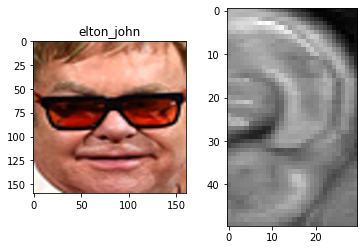

Ear Prob Score: [[13.32299466 56.7455165  12.26934508  7.91643585  9.74570791]]
Face Prob Score: [[ 2.16737744 88.6162799   1.54162565  2.48893189  5.18578513]]
Fused Prediction: 1
actual Label 1


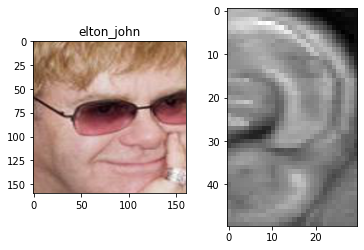

Ear Prob Score: [[13.32299466 56.7455165  12.26934508  7.91643585  9.74570791]]
Face Prob Score: [[ 1.21332053 90.98559602  1.79254784  3.03359196  2.97494366]]
Fused Prediction: 1
actual Label 1


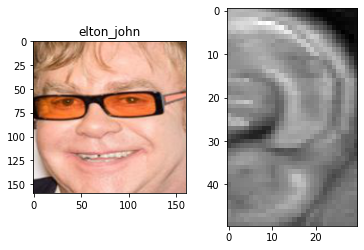

Ear Prob Score: [[13.32299466 56.7455165  12.26934508  7.91643585  9.74570791]]
Face Prob Score: [[ 1.28125702 89.07054328  1.24521824  2.28000186  6.12297961]]
Fused Prediction: 1
actual Label 1


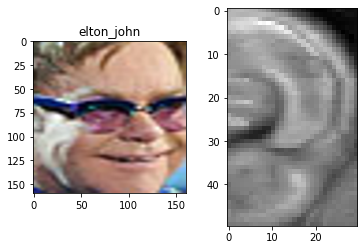

Ear Prob Score: [[13.32299466 56.7455165  12.26934508  7.91643585  9.74570791]]
Face Prob Score: [[ 2.36198617 92.19967256  1.06679195  1.4969524   2.87459692]]
Fused Prediction: 1
actual Label 1


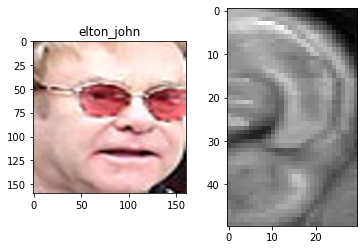

Ear Prob Score: [[ 4.89688515 10.48819428 18.05008953 58.04794285  8.51688819]]
Face Prob Score: [[ 4.11353402  4.18463593  2.12144408 83.59030675  5.99007921]]
Fused Prediction: 3
actual Label 3


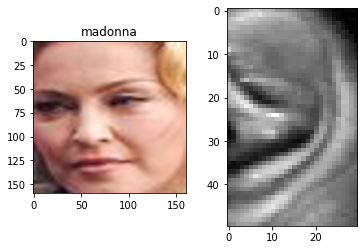

Ear Prob Score: [[ 4.89688515 10.48819428 18.05008953 58.04794285  8.51688819]]
Face Prob Score: [[ 3.05322975  4.99159031  2.7180553  81.17880336  8.05832128]]
Fused Prediction: 3
actual Label 3


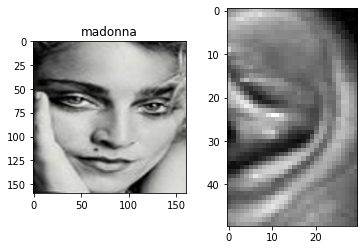

Ear Prob Score: [[ 4.89688515 10.48819428 18.05008953 58.04794285  8.51688819]]
Face Prob Score: [[ 2.58264128  2.93220723  1.33274264 88.71862071  4.43378814]]
Fused Prediction: 3
actual Label 3


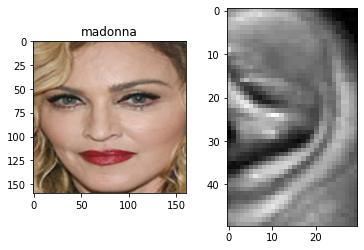

Ear Prob Score: [[ 4.89688515 10.48819428 18.05008953 58.04794285  8.51688819]]
Face Prob Score: [[ 2.34226634  3.21296395  1.20289443 86.00998805  7.23188724]]
Fused Prediction: 3
actual Label 3


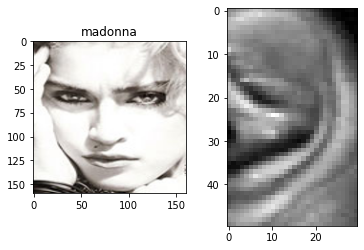

Ear Prob Score: [[ 6.71058382 13.9457011  56.13774322 13.83537812  9.37059374]]
Face Prob Score: [[ 3.32395598  9.56318906 74.32633814  6.17861427  6.60790255]]
Fused Prediction: 2
actual Label 2


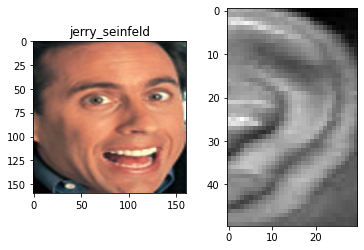

Ear Prob Score: [[ 6.71058382 13.9457011  56.13774322 13.83537812  9.37059374]]
Face Prob Score: [[ 1.93264527  3.71971884 89.68949953  2.6545313   2.00360506]]
Fused Prediction: 2
actual Label 2


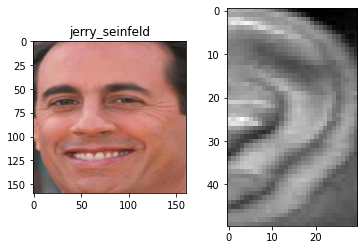

Ear Prob Score: [[ 6.71058382 13.9457011  56.13774322 13.83537812  9.37059374]]
Face Prob Score: [[ 4.33186582  4.24536109 87.08000765  1.91465612  2.42810932]]
Fused Prediction: 2
actual Label 2


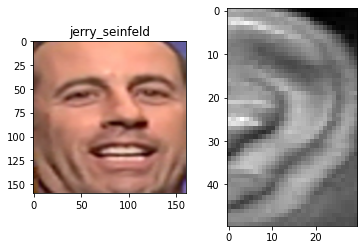

Ear Prob Score: [[ 6.71058382 13.9457011  56.13774322 13.83537812  9.37059374]]
Face Prob Score: [[ 4.09781447  7.30547865 83.49950072  2.35733751  2.73986866]]
Fused Prediction: 2
actual Label 2


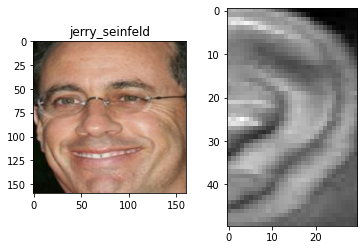

Ear Prob Score: [[ 6.71058382 13.9457011  56.13774322 13.83537812  9.37059374]]
Face Prob Score: [[ 2.51937566  3.99337074 88.2358735   2.50321603  2.74816407]]
Fused Prediction: 2
actual Label 2


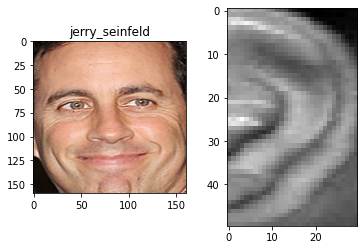

Ear Prob Score: [[ 7.2558226  15.891665   50.50989446 13.76379785 12.57882008]]
Face Prob Score: [[ 3.32395598  9.56318906 74.32633814  6.17861427  6.60790255]]
Fused Prediction: 2
actual Label 2


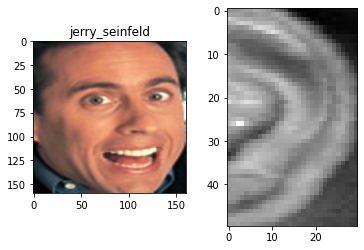

Ear Prob Score: [[ 7.2558226  15.891665   50.50989446 13.76379785 12.57882008]]
Face Prob Score: [[ 1.93264527  3.71971884 89.68949953  2.6545313   2.00360506]]
Fused Prediction: 2
actual Label 2


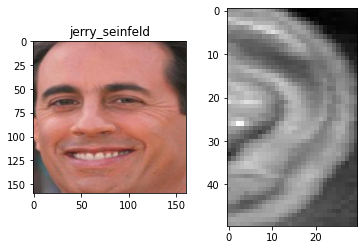

Ear Prob Score: [[ 7.2558226  15.891665   50.50989446 13.76379785 12.57882008]]
Face Prob Score: [[ 4.33186582  4.24536109 87.08000765  1.91465612  2.42810932]]
Fused Prediction: 2
actual Label 2


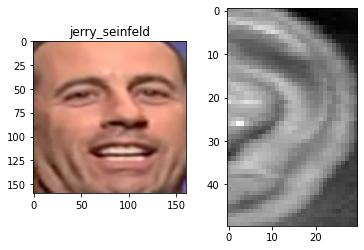

Ear Prob Score: [[ 7.2558226  15.891665   50.50989446 13.76379785 12.57882008]]
Face Prob Score: [[ 4.09781447  7.30547865 83.49950072  2.35733751  2.73986866]]
Fused Prediction: 2
actual Label 2


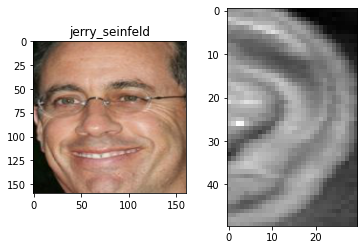

Ear Prob Score: [[ 7.2558226  15.891665   50.50989446 13.76379785 12.57882008]]
Face Prob Score: [[ 2.51937566  3.99337074 88.2358735   2.50321603  2.74816407]]
Fused Prediction: 2
actual Label 2


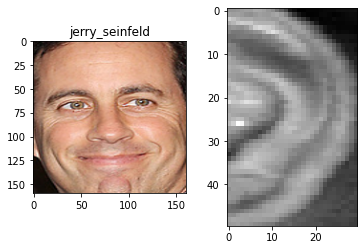

Ear Prob Score: [[ 9.59509611 17.97946466 27.63991934 14.5817265  30.20379338]]
Face Prob Score: [[ 4.64372205  3.66635697  3.33381282  4.89176485 83.4643433 ]]
Fused Prediction: 4
actual Label 4


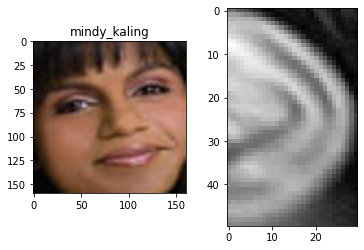

Ear Prob Score: [[ 9.59509611 17.97946466 27.63991934 14.5817265  30.20379338]]
Face Prob Score: [[ 2.85997599  2.2232589   1.20428638  1.61967945 92.09279929]]
Fused Prediction: 4
actual Label 4


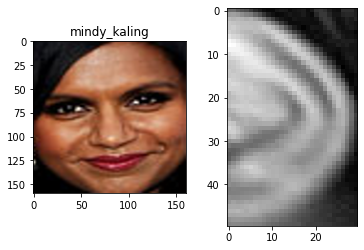

Ear Prob Score: [[ 9.59509611 17.97946466 27.63991934 14.5817265  30.20379338]]
Face Prob Score: [[ 3.1672385   1.57101105  1.15731002  0.71097789 93.39346253]]
Fused Prediction: 4
actual Label 4


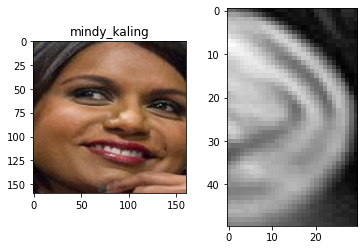

Ear Prob Score: [[ 9.59509611 17.97946466 27.63991934 14.5817265  30.20379338]]
Face Prob Score: [[ 2.65590544  2.5005453   0.76983048  2.01086244 92.06285633]]
Fused Prediction: 4
actual Label 4


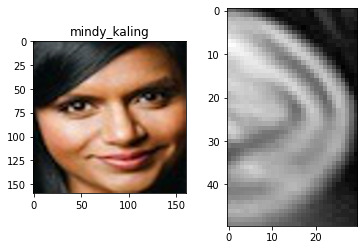

Ear Prob Score: [[ 9.59509611 17.97946466 27.63991934 14.5817265  30.20379338]]
Face Prob Score: [[ 2.58517715  2.52153563  1.50275366  1.88890386 91.50162971]]
Fused Prediction: 4
actual Label 4


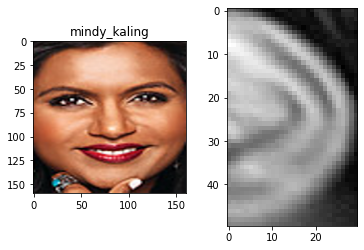

Ear Prob Score: [[59.69649752 16.55428155  8.06608262  5.62237794 10.06076037]]
Face Prob Score: [[84.55028536  4.66976355  2.3210527   2.8048399   5.65405849]]
Fused Prediction: 0
actual Label 0


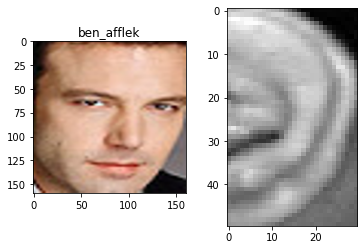

Ear Prob Score: [[59.69649752 16.55428155  8.06608262  5.62237794 10.06076037]]
Face Prob Score: [[69.49786074  9.68048268  3.55542147 11.29955638  5.96667873]]
Fused Prediction: 0
actual Label 0


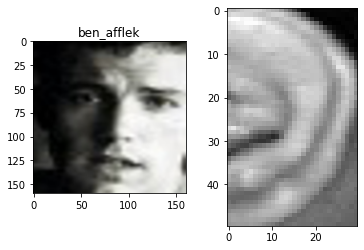

Ear Prob Score: [[59.69649752 16.55428155  8.06608262  5.62237794 10.06076037]]
Face Prob Score: [[87.56072671  2.47523068  1.8969604   3.76756282  4.29951939]]
Fused Prediction: 0
actual Label 0


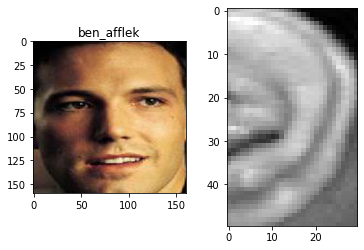

Ear Prob Score: [[59.69649752 16.55428155  8.06608262  5.62237794 10.06076037]]
Face Prob Score: [[86.95872349  3.7017034   2.45749947  3.08217374  3.7998999 ]]
Fused Prediction: 0
actual Label 0


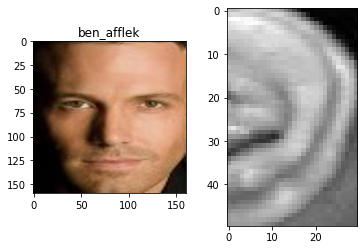

Ear Prob Score: [[59.69649752 16.55428155  8.06608262  5.62237794 10.06076037]]
Face Prob Score: [[87.534035    3.73134524  3.12080476  2.53638753  3.07742747]]
Fused Prediction: 0
actual Label 0


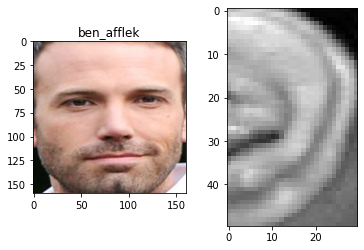

Ear Prob Score: [[ 7.17668964 15.48897129 51.10290498 13.78826299 12.44317109]]
Face Prob Score: [[ 3.32395598  9.56318906 74.32633814  6.17861427  6.60790255]]
Fused Prediction: 2
actual Label 2


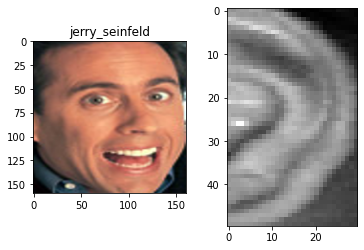

Ear Prob Score: [[ 7.17668964 15.48897129 51.10290498 13.78826299 12.44317109]]
Face Prob Score: [[ 1.93264527  3.71971884 89.68949953  2.6545313   2.00360506]]
Fused Prediction: 2
actual Label 2


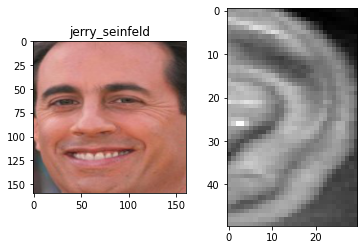

Ear Prob Score: [[ 7.17668964 15.48897129 51.10290498 13.78826299 12.44317109]]
Face Prob Score: [[ 4.33186582  4.24536109 87.08000765  1.91465612  2.42810932]]
Fused Prediction: 2
actual Label 2


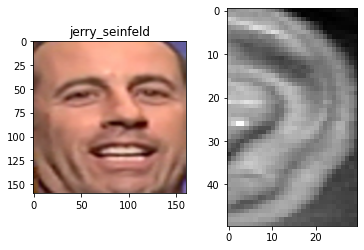

Ear Prob Score: [[ 7.17668964 15.48897129 51.10290498 13.78826299 12.44317109]]
Face Prob Score: [[ 4.09781447  7.30547865 83.49950072  2.35733751  2.73986866]]
Fused Prediction: 2
actual Label 2


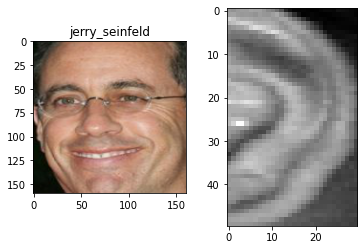

Ear Prob Score: [[ 7.17668964 15.48897129 51.10290498 13.78826299 12.44317109]]
Face Prob Score: [[ 2.51937566  3.99337074 88.2358735   2.50321603  2.74816407]]
Fused Prediction: 2
actual Label 2


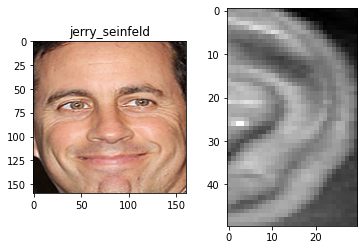

In [ ]:
val = np.array(val).reshape((-1,6))
plt.figure(figsize = (10,20))
count = -1

for i in range(len(val)):
        print('Ear Prob Score: {}'.format(val[i,1]*100))
        print('Face Prob Score: {}'.format(val[i,2]*100))
        print('Fused Prediction: {}'.format(val[i,0]))
        print('actual Label {}'.format(val[i,3]))
        plt.subplot(1,2,1)
        plt.title(classes[val[i,0]])
        plt.imshow(testX[val[i,5]])
        plt.subplot(1,2,2)
        img = X_test[val[i,4]].reshape((180,50))
        img = cv2.resize(img,(30,50))
        plt.gray()
        plt.title(classes[val[i,0]])
        plt.imshow(img)
        plt.show()


In [ ]:
selection = choice([i for i in range(testX.shape[0])])


(128,)

In [ ]:
model_face.predict_proba(emdTestX_norm[0].reshape(1,-1))
random_face_emd = emdTestX_norm[selection]
samples = np.expand_dims(random_face_emd, axis=0)
samples.shape

(1, 128)